### Objective: Build a classifier to predict whether a patient has diabetes based on numerical medical measurements.

## Step 1: Load dataset

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

df=pd.read_csv('https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In the data description it is mentioned that entire data is about female.\
Pregnancies: Number of times pregnant\
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test\
BloodPressure: Diastolic blood pressure (mm Hg)\
SkinThickness: Triceps skin fold thickness (mm)\
Insulin: 2-Hour serum insulin (mu U/ml)\
BMI: Body mass index (weight in kg/(height in m)^2)\
DiabetesPedigreeFunction: This is a function that scores the likelihood of diabetes based on family history. Higher values indicate a stronger genetic predisposition to diabetes.\
Age: Age (Years)\
Outcome: If the Patient has Diabetes or not (0 or 1).

## Step 2: data preprocessing
Prepare the data for training by splitting it into training and testing sets and normalizing the features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into features and labels
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 3: Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 4: Model Training

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5302 - loss: 0.7011 - val_accuracy: 0.6234 - val_loss: 0.6504
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6383 - loss: 0.6260 - val_accuracy: 0.6558 - val_loss: 0.6242
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6404 - loss: 0.6288 - val_accuracy: 0.6688 - val_loss: 0.6051
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6926 - loss: 0.6015 - val_accuracy: 0.6818 - val_loss: 0.5871
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6926 - loss: 0.5950 - val_accuracy: 0.6883 - val_loss: 0.5729
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7259 - loss: 0.5572 - val_accuracy: 0.6948 - val_loss: 0.5610
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7455 - loss: 0.5283 - val_accuracy: 0.7013 - val_loss: 0.5512
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7539 - loss: 0.5190 - val_accuracy: 0.6948 - val_loss

Print the accuracy curve to see how good the model is

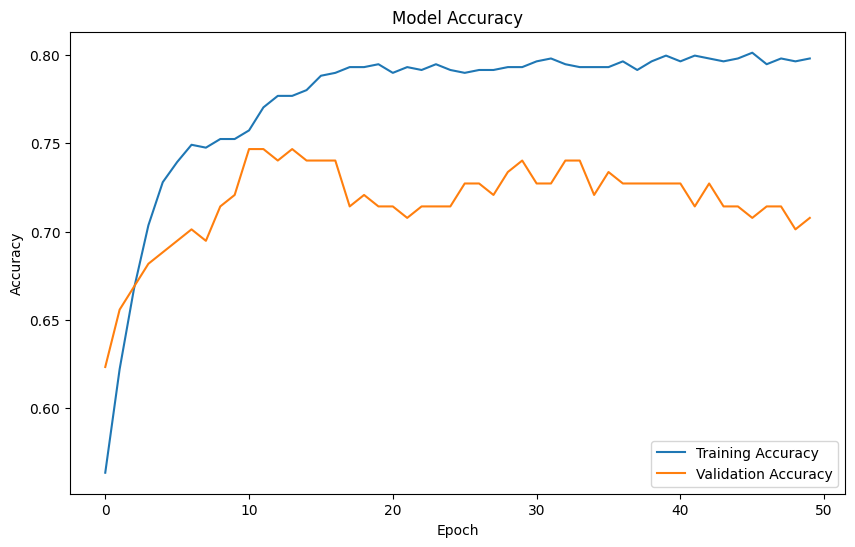

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Step 5: Evaluate the model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

5/5 [==============================] - 0s 4ms/step - loss: 0.4920 - accuracy: 0.7208
Accuracy: 0.7207792401313782


## Step 6: Make predictions

In [ ]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary output


acc_test = accuracy_score(y_test, predictions)
acc_test

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


0.7077922077922078

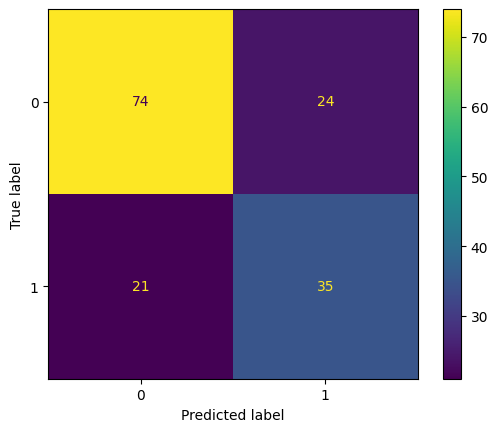

In [ ]:
# display training confusion matrix
cm_test = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()